In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
clinic = pd.read_csv('vitaldb_cases.csv')
clinic

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


Text(0.5, 0, 'Surgery Duration (in seconds)')

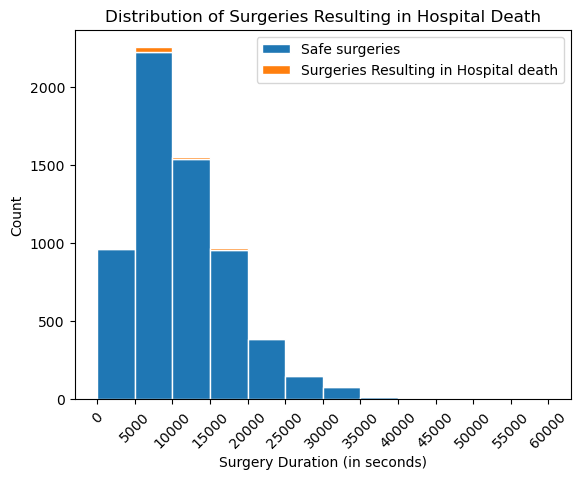

In [5]:
death = clinic[clinic['death_inhosp'] == 1]
safe = clinic[clinic['death_inhosp'] == 0]

bins = np.arange(0, 65000, 5000)
labels=['Safe surgeries', 'Surgeries Resulting in Hospital death']
plt.hist([safe['caseend'], death['caseend']], stacked=True, ec='w',bins = bins,label=labels)
plt.xticks(bins, rotation=45)
plt.title('Distribution of Surgeries Resulting in Hospital Death')
plt.ylabel('Count')
plt.legend()
plt.xlabel('Surgery Duration (in seconds)')

0       11400.0
1       15960.0
2        4800.0
3       21000.0
4       23400.0
         ...   
6383    15900.0
6384    21540.0
6385    19800.0
6386    13380.0
6387    10200.0
Name: duration, Length: 6387, dtype: float64


Text(0, 0.5, 'BMI')

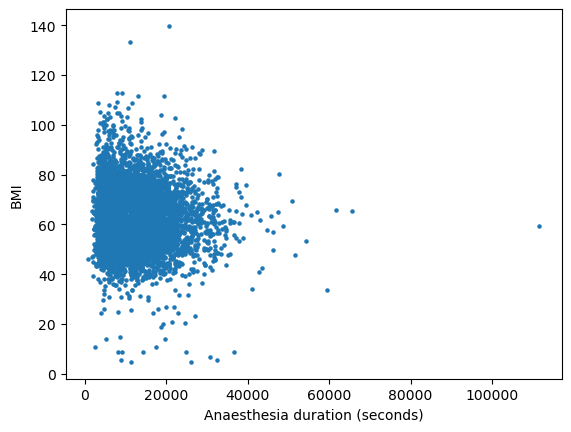

In [26]:
clinic['duration'] = clinic['aneend'] - clinic['anestart']
clinic_edited = clinic[clinic['duration'] > 0]
print(clinic_edited['duration'])
plt.scatter(clinic_edited['duration'], clinic_edited['weight'], s=5)
plt.xlabel('Anaesthesia duration (seconds)')
plt.ylabel('BMI')